In [20]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
cwd = '/data/co2flux/common/mdomhoef/Oslo/Oslo_analysis/'
year = 2018
stations_file = cwd + 'Stations.csv'
years_file = cwd + 'Station_years.csv'

In [22]:
#getting the station names witch exist for year 
stations = pd.read_csv(stations_file, sep = ',')
years_st = pd.read_csv(years_file, index_col= 0) 
for station in stations['Station'].unique():
    if years_st.loc[year][station] != 1.0:
        stations = stations.drop(stations[stations['Station'] == station].index)
snames = stations['Station'].unique()

In [23]:
snames

array(['FI-Hyy', 'FI-Let', 'FI-Qvd', 'SE-Lnn', 'SE-Ros', 'SE-Svb',
       'SE-Deg', 'SE-Htm', 'SE-Nor'], dtype=object)

In [24]:
#getting paths of stations
files = os.listdir(cwd +"/data/HH_Data_small/")
path_station_files = [cwd +"/data/HH_Data_small/" + s for s in files if any(xs in s for xs in snames)]

In [25]:
#load vprm output 
vprm_path = cwd + 'VPRMoutput/VPRM.ERA5_pscale1_2018.csv'
vprm_df = pd.read_csv(vprm_path)

In [26]:
vprm_df.head()

,Times,FI-Hyy_GEE,FI-Hyy_RSP,FI-Hyy_NEE,FI-Let_GEE,FI-Let_RSP,FI-Let_NEE,FI-Qvd_GEE,FI-Qvd_RSP,FI-Qvd_NEE,...,SE-Svb_NEE,SE-Deg_GEE,SE-Deg_RSP,SE-Deg_NEE,SE-Htm_GEE,SE-Htm_RSP,SE-Htm_NEE,SE-Nor_GEE,SE-Nor_RSP,SE-Nor_NEE
0,2018-01-01 00:00:00,-0.0,207.934992,207.934992,NaN,207.934992,NaN,-0.0,1390.189864,1390.189864,...,NaN,NaN,62.760996,NaN,-0.0,1974.926426,1974.926426,NaN,207.934992,NaN
1,2018-01-01 00:30:00,-0.0,207.934992,207.934992,NaN,207.934992,NaN,-0.0,1359.339317,1359.339317,...,NaN,NaN,62.760996,NaN,-0.0,1975.716254,1975.716254,NaN,207.934992,NaN
2,2018-01-01 01:00:00,-0.0,207.934992,207.934992,NaN,207.934992,NaN,-0.0,1328.488770,1328.488770,...,NaN,NaN,62.760996,NaN,-0.0,1976.506083,1976.506083,NaN,207.934992,NaN
3,2018-01-01 01:30:00,-0.0,207.934992,207.934992,NaN,207.934992,NaN,-0.0,1300.283175,1300.283175,...,NaN,NaN,62.760996,NaN,-0.0,1843.349136,1843.349136,NaN,207.934992,NaN
4,2018-01-01 02:00:00,-0.0,207.934992,207.934992,NaN,207.934992,NaN,-0.0,1272.077581,1272.077581,...,NaN,NaN,62.760996,NaN,-0.0,1710.192190,1710.192190,NaN,207.934992,NaN


In [27]:
print(vprm_df.columns)

Index(['Times', 'FI-Hyy_GEE', 'FI-Hyy_RSP', 'FI-Hyy_NEE', 'FI-Let_GEE',
       'FI-Let_RSP', 'FI-Let_NEE', 'FI-Qvd_GEE', 'FI-Qvd_RSP', 'FI-Qvd_NEE',
       'SE-Lnn_GEE', 'SE-Lnn_RSP', 'SE-Lnn_NEE', 'SE-Ros_GEE', 'SE-Ros_RSP',
       'SE-Ros_NEE', 'SE-Svb_GEE', 'SE-Svb_RSP', 'SE-Svb_NEE', 'SE-Deg_GEE',
       'SE-Deg_RSP', 'SE-Deg_NEE', 'SE-Htm_GEE', 'SE-Htm_RSP', 'SE-Htm_NEE',
       'SE-Nor_GEE', 'SE-Nor_RSP', 'SE-Nor_NEE'],
      dtype='object')


In [28]:
#get example for station SE Lnn
name = snames[2]
print(name)
matching = [s for s in vprm_df.columns if name in s]
vprm_df_se = vprm_df[vprm_df.columns.intersection(matching)]
# f = [s for s in files if name in s]
vprm_df_se.head()

FI-Qvd


,FI-Qvd_GEE,FI-Qvd_RSP,FI-Qvd_NEE
0,-0.0,1390.189864,1390.189864
1,-0.0,1359.339317,1359.339317
2,-0.0,1328.488770,1328.488770
3,-0.0,1300.283175,1300.283175
4,-0.0,1272.077581,1272.077581


In [29]:
path = cwd +"data/HH_Data_small/" + [s for s in files if name in s][0]
print(path)
df = pd.read_csv(path)
df[df.loc[:, df.columns != 'date'] < -9998] = np.nan
df.date = pd.to_datetime(df.date)
df['year'] = df['date'].dt.year
df = df[df['year']==year].reset_index()
df = df.iloc[: , 2:]
df.head()

/data/co2flux/common/mdomhoef/Oslo/Oslo_analysis/data/HH_Data_small/new_FLX_FI-Qvd_FLUXNET2015_FULLSET_HH_2018-2020_beta-3.csv


,TIMESTAMP_START,TIMESTAMP_END,TA_F_MDS,TA_F_MDS_QC,TA_F,TA_F_QC,SW_IN_F_MDS,SW_IN_F,VPD_F_MDS,VPD_F,TS_F_MDS_1,TS_F_MDS_1_QC,NEE_VUT_REF,NEE_VUT_REF_QC,RECO_NT_VUT_REF,GPP_NT_VUT_REF,RECO_DT_VUT_REF,GPP_DT_VUT_REF,date,year
0,201801010000,201801010030,NaN,NaN,0.287,2,NaN,0.0,NaN,1.166,NaN,NaN,2.32531,3,2.41022,0.084914,2.25519,0.0,2018-01-01 00:00:00,2018
1,201801010030,201801010100,NaN,NaN,0.294,2,NaN,0.0,NaN,1.170,NaN,NaN,3.93040,3,2.41154,-1.518860,2.25555,0.0,2018-01-01 00:30:00,2018
2,201801010100,201801010130,NaN,NaN,0.301,2,NaN,0.0,NaN,1.173,NaN,NaN,4.12800,3,2.41285,-1.715150,2.25592,0.0,2018-01-01 01:00:00,2018
3,201801010130,201801010200,NaN,NaN,0.323,2,NaN,0.0,NaN,1.187,NaN,NaN,2.56691,3,2.41698,-0.149933,2.25708,0.0,2018-01-01 01:30:00,2018
4,201801010200,201801010230,NaN,NaN,0.345,2,NaN,0.0,NaN,1.200,NaN,NaN,2.59460,3,2.42111,-0.173493,2.25823,0.0,2018-01-01 02:00:00,2018


<AxesSubplot:xlabel='date', ylabel='vals'>

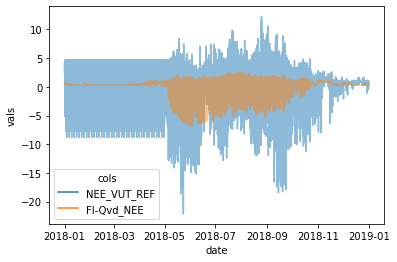

In [30]:
#plot vprm outcoome to df 
vprm_df_se = vprm_df_se/3600
frame = pd.concat([df['date'],df['NEE_VUT_REF'], vprm_df_se[name+'_NEE']], axis = 1)
new_frame = frame.melt('date', var_name='cols', value_name='vals')
sns.lineplot(x = 'date', y = 'vals', hue = 'cols', data = new_frame, alpha=0.5)

In [31]:
#divide all values by 1000
vprm_df.loc[:, vprm_df.columns != 'Times'] = vprm_df.loc[:, vprm_df.columns != 'Times']/3600
vprm_df.head()


,Times,FI-Hyy_GEE,FI-Hyy_RSP,FI-Hyy_NEE,FI-Let_GEE,FI-Let_RSP,FI-Let_NEE,FI-Qvd_GEE,FI-Qvd_RSP,FI-Qvd_NEE,...,SE-Svb_NEE,SE-Deg_GEE,SE-Deg_RSP,SE-Deg_NEE,SE-Htm_GEE,SE-Htm_RSP,SE-Htm_NEE,SE-Nor_GEE,SE-Nor_RSP,SE-Nor_NEE
0,2018-01-01 00:00:00,-0.0,0.05776,0.05776,NaN,0.05776,NaN,-0.0,0.386164,0.386164,...,NaN,NaN,0.017434,NaN,-0.0,0.548591,0.548591,NaN,0.05776,NaN
1,2018-01-01 00:30:00,-0.0,0.05776,0.05776,NaN,0.05776,NaN,-0.0,0.377594,0.377594,...,NaN,NaN,0.017434,NaN,-0.0,0.548810,0.548810,NaN,0.05776,NaN
2,2018-01-01 01:00:00,-0.0,0.05776,0.05776,NaN,0.05776,NaN,-0.0,0.369025,0.369025,...,NaN,NaN,0.017434,NaN,-0.0,0.549029,0.549029,NaN,0.05776,NaN
3,2018-01-01 01:30:00,-0.0,0.05776,0.05776,NaN,0.05776,NaN,-0.0,0.361190,0.361190,...,NaN,NaN,0.017434,NaN,-0.0,0.512041,0.512041,NaN,0.05776,NaN
4,2018-01-01 02:00:00,-0.0,0.05776,0.05776,NaN,0.05776,NaN,-0.0,0.353355,0.353355,...,NaN,NaN,0.017434,NaN,-0.0,0.475053,0.475053,NaN,0.05776,NaN


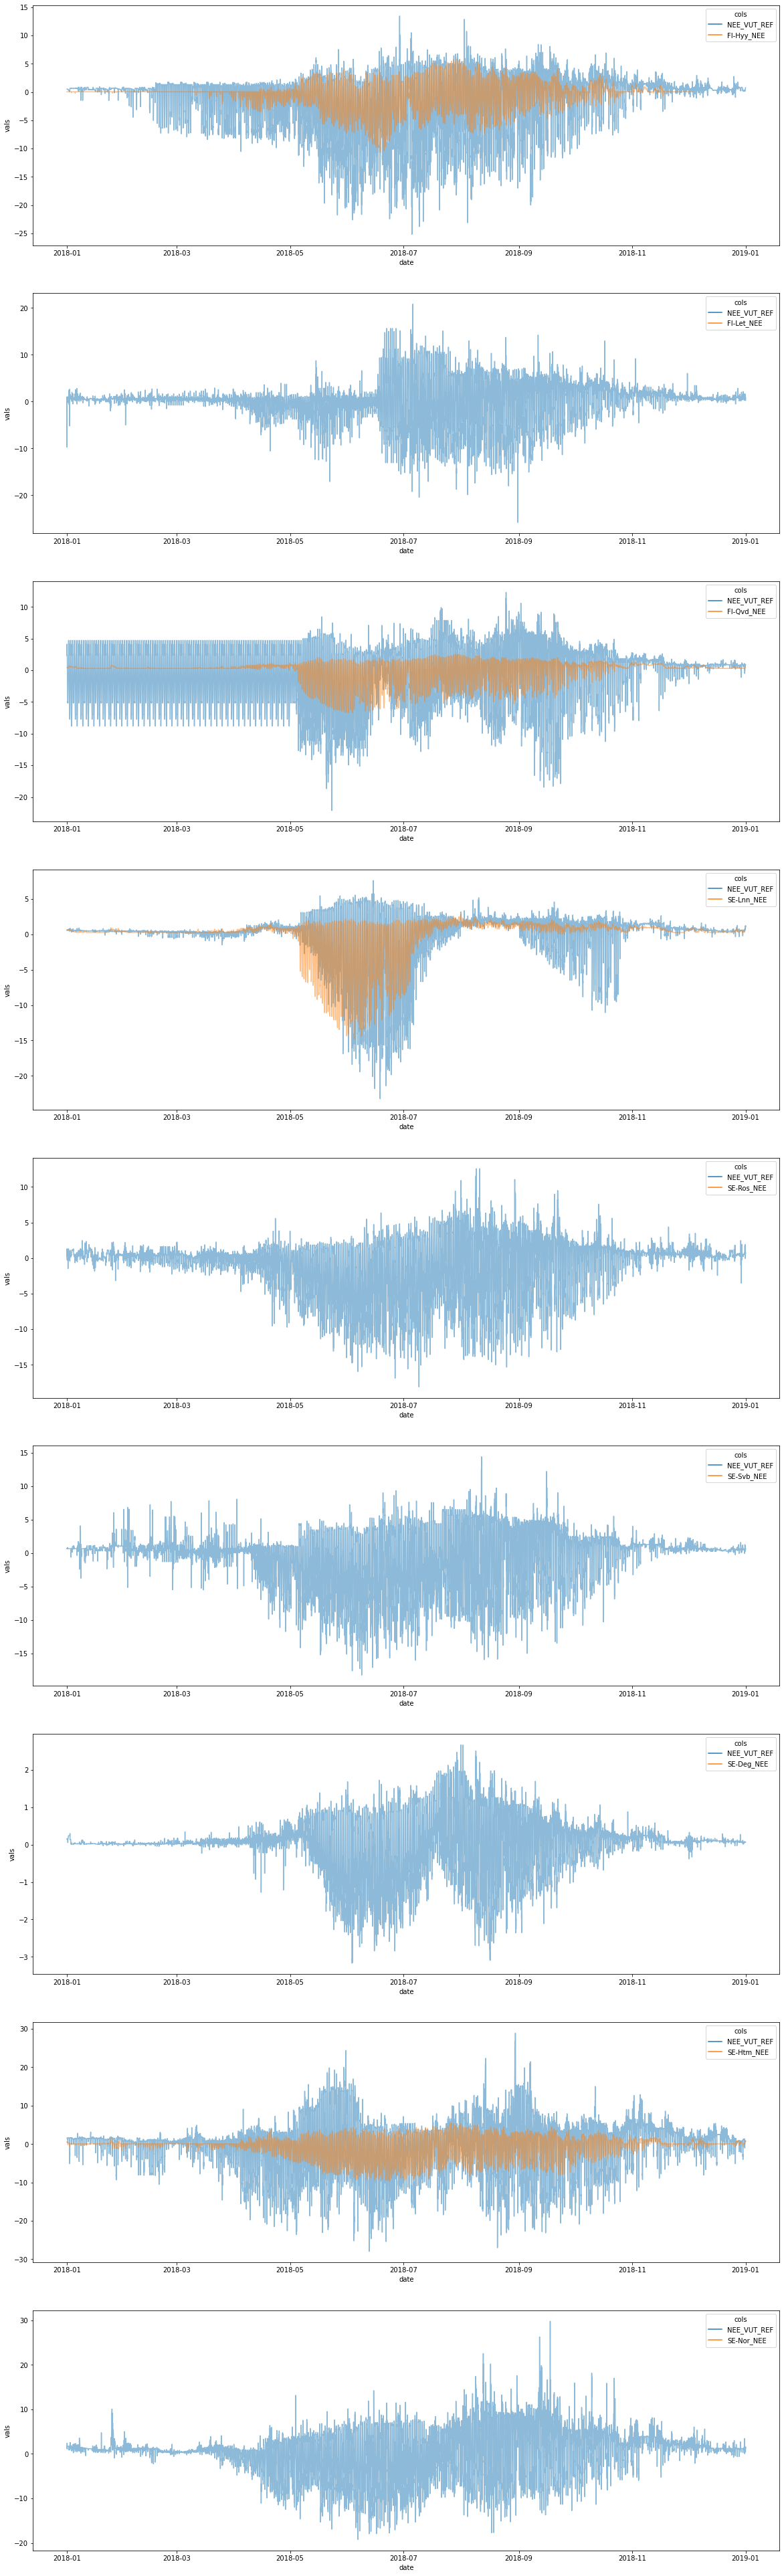

In [32]:
fig, axs = plt.subplots(int(len(snames)), figsize = (20,70))

for i, ax in enumerate(axs.flat):
    name = snames[i]
    # print(name)
    matching = [s for s in vprm_df.columns if name in s]
    vprm_df_h = vprm_df[vprm_df.columns.intersection(matching)]
    f = [s for s in files if name in s]
    
    path = cwd +"data/HH_Data_small/" + [s for s in files if name in s][0]
    # print(path)
    df = pd.read_csv(path)
    df[df.loc[:, df.columns != 'date'] < -9998] = np.nan
    df.date = pd.to_datetime(df.date)
    df['year'] = df['date'].dt.year
    df = df[df['year']==year].reset_index()
    df = df.iloc[: , 1:]
    frame = pd.concat([df['date'],df['NEE_VUT_REF'], vprm_df[name+'_NEE']], axis = 1)
    new_frame = frame.melt('date', var_name='cols', value_name='vals')
    sns.lineplot(ax = ax, x = 'date', y = 'vals', hue = 'cols', data = new_frame, alpha=0.5)#palette=sns.cubehelix_palette(light=.9, n_colors=2))
    # sns.lineplot(x = 'date', y = ['NEE_VUT_REF','FI-Hyy_NEE'] , data = frame)


In [33]:
vprm_df.isnull().any()

Times         False
FI-Hyy_GEE     True
FI-Hyy_RSP    False
FI-Hyy_NEE     True
FI-Let_GEE     True
FI-Let_RSP    False
FI-Let_NEE     True
FI-Qvd_GEE    False
FI-Qvd_RSP    False
FI-Qvd_NEE    False
SE-Lnn_GEE    False
SE-Lnn_RSP    False
SE-Lnn_NEE    False
SE-Ros_GEE     True
SE-Ros_RSP    False
SE-Ros_NEE     True
SE-Svb_GEE     True
SE-Svb_RSP    False
SE-Svb_NEE     True
SE-Deg_GEE     True
SE-Deg_RSP    False
SE-Deg_NEE     True
SE-Htm_GEE    False
SE-Htm_RSP    False
SE-Htm_NEE    False
SE-Nor_GEE     True
SE-Nor_RSP    False
SE-Nor_NEE     True
dtype: bool